**Predicting The Quality of Wine** 

This is the Project Proposal for the DSCI 100 Group Project. 
Group members: Artemis, Cathy, Abdulaziz Umiryayev

-> foundational characteristics would be figured out through trial-and-error method of finding which characteristics have the strongest correlation with quality.

**Intro**

Wine is one of the most popular alcoholic beverages in the world, with a great range between the cheapest and the most expensive wines. The project’s main objective is to determine which chemical characteristics determine wine quality to predict the quality of a new sample. 
Question: What characteristics best determine the quality of wine and how accurate is the model to predict wine quality?
The dataset we are using for the project consists information about chemical composition of each wine as well as information about that wine’s quality. The dataset was created and maintained by M Yasser H and the method for collection of data is google research. The dataset contains 1142 observations, 11 quantitative variables, and 1 categorical variable.
The variables include density, pH values, sugar level, and other quantitative variables. The categorical variable that we are using is “quality”, which is represented on the scale from 0 to 10, where the min value observed is 3 and the max value observed is 8. 
The initial model is based on the report made by Nimit Dhalia, “The Effect of Physicochemical on The Wine Quality,” which states that red wine quality tends to depend on volatile acidity, alcohol, total sulfur dioxide, and sulphites whereas white wine quality depends on density rather than sulphites. Since the dataset does not show whether the wine is white or red, variables from both categories will be used in the initial model.

**Methods**

In our dataset, all the variables in the training set will be plotted for predicted variables, wine quality. 
For our classification, after splitting our data into training and testing sets, we will use cross validation to tune for the best K:
We will make a recipe with our previously discussed chosen predictors and center the data.
Then, we will create a workflow, using our model and recipe.
We will use collect_metrics() and use the results to model the K vs accuracy and choose a K.
At last, we will get our test data and predict wine quality using our trained model.
We will visualize all results using scatter plots.


**Outcomes**

We expect that the factors mentioned above will allow us to predict the quality of a wine based on easily measurable factors such as sulfur dioxide levels and volatile acidity. The classification scheme could save time and money for vineyards, because quality could be determined without each wine being tasted by a sommelier. A classification system such as this one could also lead to a closer price to quality ratio in wines, allowing consumers to have a better sense of what they’re buying. 
Our results may lead to further questions such as “how well does wine quality correlate to price?” and “how much do the optimum levels of predictors change with different types of wine, for example pinot versus cabernet?”

**Visualizations**

In [3]:
#load in packages
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [4]:

dataset <- read_csv('data/WineQT.csv')
#renames the columns and gets rid of the spaces
colnames(dataset)<- c('fix_acid','vol_acid','citric_acid','resid_sugar','chlorides','free_sugar_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol','quality','id')
upd <- dataset %>%
         #turns quality variable into a factor
         mutate(quality = as_factor(quality))

#moves ID column at the beginning 
updated_dataset <- upd[,c(13,1,2,3,4,5,6,7,8,9,10,11,12)]
updated_dataset


Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double(),
  Id = col_double()
)



id,fix_acid,vol_acid,citric_acid,resid_sugar,chlorides,free_sugar_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1594,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5


In [5]:
wine_split <- initial_split(updated_dataset, prop = 0.75, strata = quality)
wine_train <- training(wine_split)
wine_test <- testing(wine_split)

wine_train

id,fix_acid,vol_acid,citric_acid,resid_sugar,chlorides,free_sugar_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1592,6.3,0.51,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
1593,6.8,0.62,0.08,1.9,0.068,28,38,0.99651,3.42,0.82,9.5,6
1595,5.9,0.55,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6


In [6]:

            
wine_summarize <- wine_train%>% 
                       group_by(quality)%>%
                       summarise(vol_acid_avg = median(vol_acid), alcohol_avg = median(alcohol), total_sulfur_dioxide_avg = median(total_sulfur_dioxide),sulphates_avg = median(sulphates), density_avg = median(density), count = n())


                        
#the quality distribution falls into the Gaussian normal distribution

#the reason for median is to get 
wine_summarize

`summarise()` ungrouping output (override with `.groups` argument)



quality,vol_acid_avg,alcohol_avg,total_sulfur_dioxide_avg,sulphates_avg,density_avg,count
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
3,0.7600,9.95,14.0,0.570,0.998080,5
4,0.6775,10.00,31.0,0.565,0.996570,28
5,0.5800,9.60,45.0,0.570,0.996900,362
6,0.5000,10.50,35.5,0.640,0.996575,346
7,0.3700,11.60,29.0,0.750,0.995500,107
8,0.3550,11.55,20.5,0.790,0.995580,10


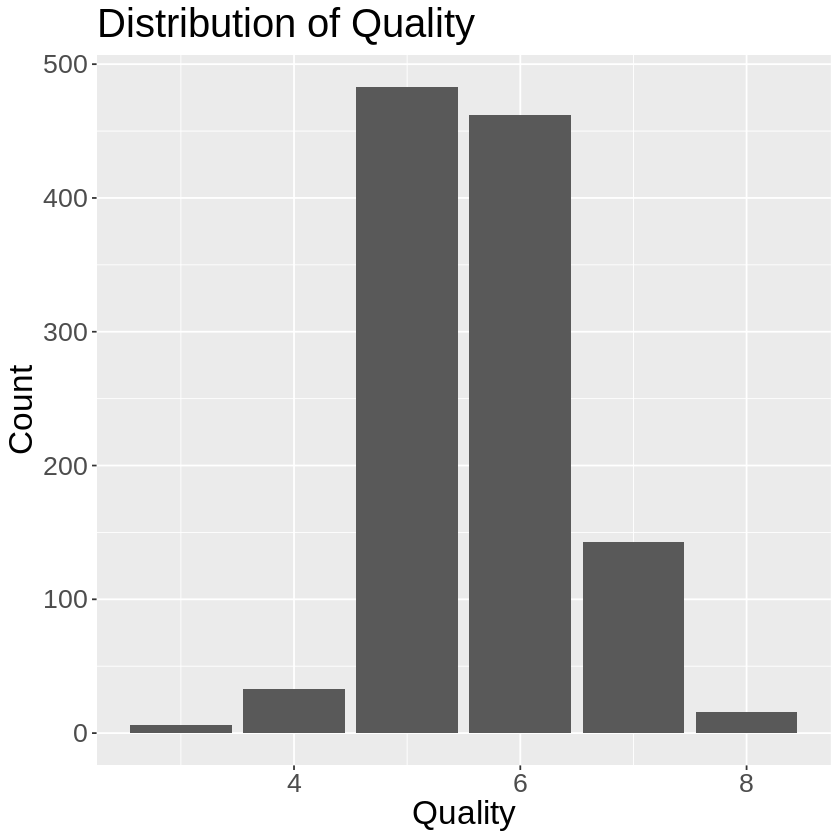

In [7]:
bar_overall <- dataset%>%
                ggplot(aes(x = quality))+
                geom_bar(stat= "count")+
                labs(x = 'Quality', title = "Distribution of Quality", y = "Count")+
                theme(text = element_text(size = 20))
bar_overall

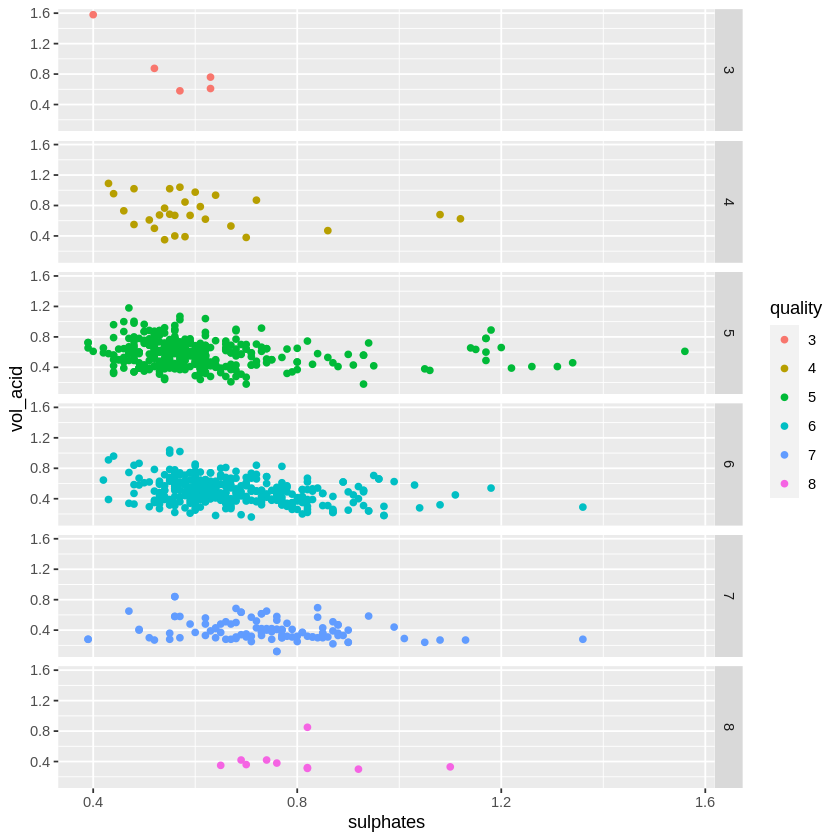

In [13]:
data_visualization <- wine_train %>%
                     ggplot(aes(y = vol_acid, x = sulphates, color = quality))+
                     geom_point()+
                     facet_grid(rows = vars(quality))
data_visualization